In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pandas
import os
import seaborn as sns

import tissue.api as tissue

In [3]:
# user = "david.fischer"
# user = "ina"
user = "mayar.ali"

if user == "david.fischer":
    base_path_gcn = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
    base_path_mi = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
    base_path_reg = "/Users/david.fischer/phd/seafile/DavidFischer_notforFabian/tissue/grid_searches/metabric/"
elif user == "ina":
    base_path_gcn = '../../results/GCN/basel_zurich/'
    base_path_reg = '../../results/REG/basel_zurich/'
    
elif user == "mayar.ali":
    base_path_gcn = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"
    base_path_mi = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"
    base_path_reg = "/home/iterm/mayar.ali/phd/projects/tissue/grid_searches/refactor/metabric/"


# Overall

In [15]:
dir_figures="/lustre/groups/ml01/workspace/mayar.ali/tissue/figures/metabric/"

### Grade


In [4]:
source_path={
    
    "2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1": base_path_gcn,
    "2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS": base_path_mi,
    "2205030953_REG_GRADE_STANDARD": base_path_mi,
    
    "2207221122_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary": base_path_gcn,
    "2207221121_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary": base_path_gcn,
    "2207221122_MI_NONE_GRADE_TYPE_metabric_RADIUS_binary": base_path_mi,
    "2207221206_REG_GRADE_TYPE_binary": base_path_reg,


}
gs_ids=[
    "2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1",
    "2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS",
    "2205030953_REG_GRADE_STANDARD",
    
    "2207221122_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary",
    "2207221121_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary",
    "2207221122_MI_NONE_GRADE_TYPE_metabric_RADIUS_binary",
    "2207221206_REG_GRADE_TYPE_binary",
]

In [5]:
container = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids
)
container.load_gs()

loaded 2205100927_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205122013_GCNSS_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205131048_GCN_NONE_GRADE_STANDARD_metabric_RADIUS_TRANSFORM_KEY_1: 72 runs with 6-fold cross validation
loaded 2205030952_MI_NONE_GRADE_STANDARD_metabric_RADIUS: 162 runs with 6-fold cross validation
loaded 2205030953_REG_GRADE_STANDARD: 72 runs with 6-fold cross validation
loaded 2207221122_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary: 4 runs with 6-fold cross validation
loaded 2207221121_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary: 4 runs with 6-fold cross validation
loaded 2207221122_MI_NONE_GRADE_TYPE_metabric_RADIUS_binary: 4 runs with 6-fold cross validation
loaded 2207221206_REG_GRADE_TYPE_binary: 4 runs with 6-fold cross validation


In [6]:
sns.set_palette("gray_r")

selected ['model_class']
means=model_class
GCN      0.580464
GCNSS    0.605445
MI       0.617505
MLP      0.577250
Name: test_grade_custom_categorical_acc, dtype: float64
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MI_molecular v.s. MI_types: t-test independent samples, P_val=5.681e-03 stat=3.505e+00
MLP_molecular v.s. MLP_types: t-test independent samples, P_val=4.323e-01 stat=8.181e-01
GCN_molecular v.s. GCN_types: t-test independent samples, P_val=2.062e-04 stat=5.672e+00
GCNSS_molecular v.s. GCNSS_types: t-test independent samples, P_val=5.757e-04 stat=4.953e+00


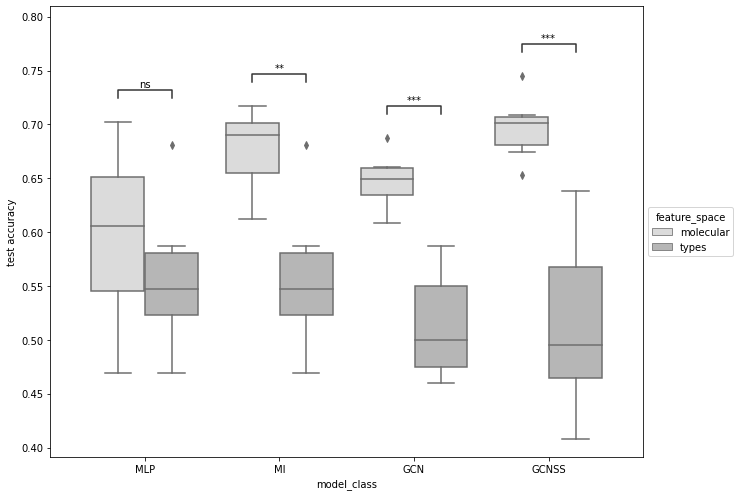

In [7]:
# t-test welch

### test chosen on train
group_name="grade"
container.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    param_hue="feature_space",  #  feature_space, depth_feature_embedding
    param_x=['model_class'],
#     save=dir_figures+"supp4_refactored_test_on_train_types_molecular_binary", 
    suffix=".pdf",
    panel_width = 10,
    panel_height = 7,
    show_swarm=False,
    feature_space=True,
    ttest = True,
)

#### cell types analysis

In [8]:
source_path={
    "2207271142_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary": base_path_gcn,
    "2207271142_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary": base_path_gcn,
    "2207221122_MI_NONE_GRADE_TYPE_metabric_RADIUS_binary": base_path_mi,
    "2207221206_REG_GRADE_TYPE_binary": base_path_reg,
    "2207281517_REGDISP_DISPERSION_MAXDIST2_GRADE_TYPE_binary": base_path_reg,


}
gs_ids=[
    "2207271142_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary",
    "2207271142_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary",
    "2207221122_MI_NONE_GRADE_TYPE_metabric_RADIUS_binary",
    "2207221206_REG_GRADE_TYPE_binary",
    "2207281517_REGDISP_DISPERSION_MAXDIST2_GRADE_TYPE_binary",
]

In [9]:
container_typ = tissue.fits.GridSearchContainer(
    source_path=source_path,
    gs_ids=gs_ids,
)
container_typ.load_gs()


loaded 2207271142_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary: 4 runs with 6-fold cross validation
loaded 2207271142_GCN_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary: 4 runs with 6-fold cross validation
loaded 2207221122_MI_NONE_GRADE_TYPE_metabric_RADIUS_binary: 4 runs with 6-fold cross validation
loaded 2207221206_REG_GRADE_TYPE_binary: 4 runs with 6-fold cross validation
loaded 2207281517_REGDISP_DISPERSION_MAXDIST2_GRADE_TYPE_binary: 4 runs with 6-fold cross validation


In [12]:
import sklearn.metrics

In [13]:
sns.set_palette('colorblind')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MLP v.s. MI: t-test independent samples, P_val=1.192e-01 stat=-1.598e+00
MI v.s. DISP: t-test independent samples, P_val=1.864e-01 stat=1.349e+00
MI v.s. GCN: t-test independent samples, P_val=8.240e-01 stat=-2.242e-01
MI v.s. GCNSS: t-test independent samples, P_val=5.968e-01 stat=-5.341e-01


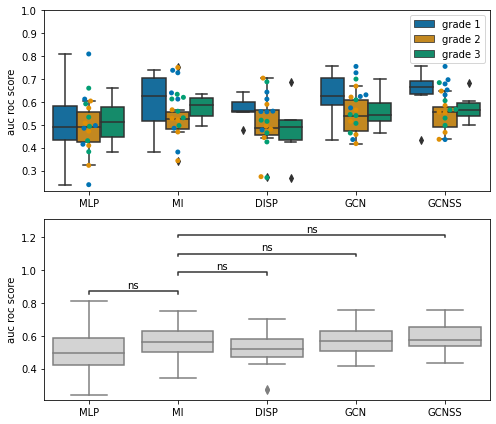

In [14]:
## history is not in the container info --> there is a get in get_info regarding getting cv training histories
group_name="grade"
container_typ.plot_best_model_roc_auc(
    partition_show="test",
#     metric_show=group_name + "_custom_categorical_acc",
    partition_select="train",
    metric_select=group_name + "_loss",
    cv_mode="mean",
    suffix=".pdf",
    panel_width = 7,
    panel_height = 6,
    ttest=True,
    plot_all_groups=True,
    dispersion=True,
#     save=dir_figures+"fig_refactored_typ_test_on_train_auc_all_groups_with_dispersion"
)

#### GCN SS

In [15]:
container_gcnss = tissue.fits.GridSearchContainer(
    source_path={
        "2207271142_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary": base_path_gcn,
    },
    gs_ids=[
        "2207271142_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary",
        
    ]
)
container_gcnss.load_gs()

loaded 2207271142_GCNSS_NONE_GRADE_TYPE_metabric_RADIUS_TRANSFORM_KEY_1_binary: 4 runs with 6-fold cross validation


In [16]:
gs_id, model_id, cv = container_gcnss.get_best_model_id(partition_select='train') ## CHANGED from VAL
container_gcnss.get_info(gs_id = gs_id, model_id=model_id)

In [17]:
sns.set_palette("colorblind")

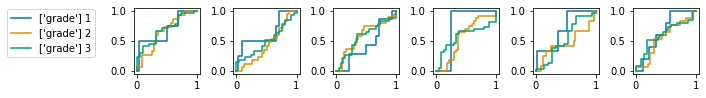

In [18]:
container_gcnss.plot_roc(partition='test')#, save=dir_figures+"supp4_test_roc_on_train_typ_binary.pdf")

In [19]:
interpreter = tissue.fits.InterpreterGraph(results_path=base_path_gcn + gs_id + "/results/", cv=cv, model_id=model_id, model_class="GCNSS")
interpreter.load_model()

data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/"
buffered_data_path="/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer"
interpreter.get_data_again(
    data_path=data_path,
    buffered_data_path=buffered_data_path
)

2022-08-19 14:58:53.883375: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/lustre/groups/ml01/workspace/mayar.ali/tissue/data/metabric/refactored/buffer/buffered_data_20_binary.pickle
Loading data from buffer
Loaded 500 images with complete data from 467 patients over 477856 cells with 39 cell features and 2 distinct celltypes.
Dropped 13 images with missing relevant target labels


/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l

/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/lib/python3.8/site-packages/sklearn/utils/validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
/home/iterm/mayar.ali/anaconda3/envs/tissuegpu/l


Whole dataset: 487 images from 441 patients.
Test dataset: 49 images from 44 patients.
Training dataset: 394 images from 357 patients.
Validation dataset: 44 images from 40 patients.



In [20]:
# group imbalance
grade_1 = [key for key in interpreter.y.keys() if interpreter.y[key]['grade'].argmax() == 0]
grade_2 = [key for key in interpreter.y.keys() if interpreter.y[key]['grade'].argmax() == 1]
grade_3 = [key for key in interpreter.y.keys() if interpreter.y[key]['grade'].argmax() == 2]

print(f'grade 1: {len(grade_1)}')
print(f'grade 2: {len(grade_2)}')
print(f'grade 3: {len(grade_3)}')

grade 1: 50
grade 2: 181
grade 3: 269


In [21]:
sns.set_palette('colorblind')

Confusion matrix on test set:


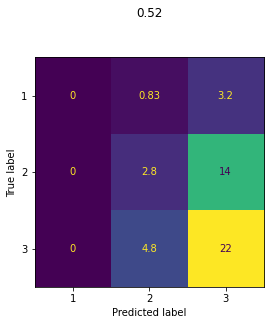

Confusion matrix on val set:


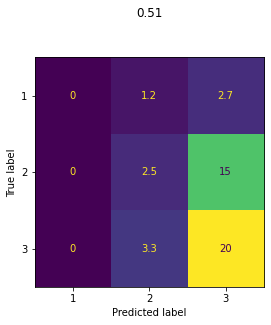

Confusion matrix on train set:


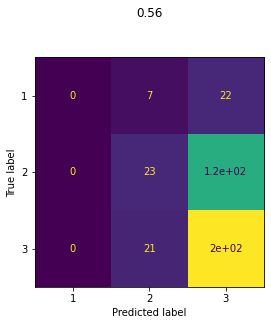

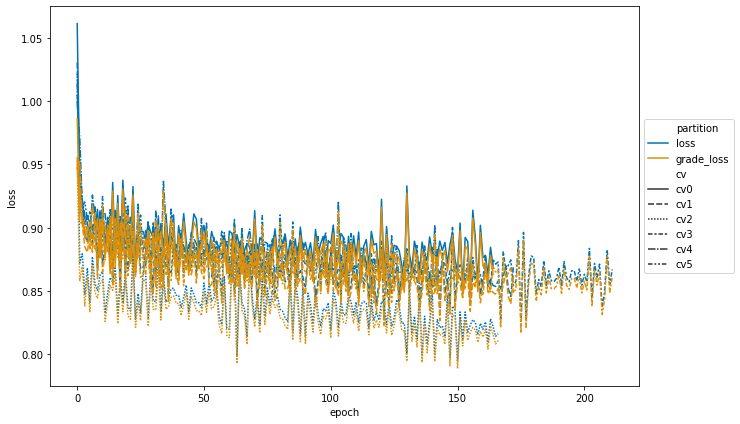


test
Grade 1 : 0.0
Grade 2 : 0.17953253765274224
Grade 3 : 0.8299353038936372
mean : 0.516769554414427

val
Grade 1 : 0.0
Grade 2 : 0.15628306878306877
Grade 3 : 0.8649335232668566
mean : 0.5113934579174559

train
Grade 1 : 0.0
Grade 2 : 0.15599885394655588
Grade 3 : 0.9046123261681537
mean : 0.5603023301006894


In [22]:
print('Confusion matrix on test set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='test',
    mean_across_cv=True,
#     save=dir_figures+"supp_conf_test_typ_refactored_on_train_binary", 
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on val set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='val',
    mean_across_cv=True,
#     save=dir_figures+"supp_conf_val_typ_refactored_on_train_binary",
#     save=save,
    x_ticks=['1', '2', '3'],
)

print('Confusion matrix on train set:')
container_gcnss.plot_confusion_matrix(
    target_label='grade',
    partition_show='train',
    mean_across_cv=True,
#     save=dir_figures+"supp_conf_train_typ_refactored_on_train_binary",
#     save=save,
    x_ticks=['1', '2', '3']
)

container_gcnss.plot_training_history(
    plot_metrics=['loss', 'grade_loss'],
#     save=dir_figures+"supp_typ_history_refactored_on_train_binary",
#     save=save,
)


for partition in ['test', 'val','train']:
    print()
    print(partition)
    mean = []
    for grade in [0, 1, 2]:
        acc = []
        for cv in ['cv0', 'cv1', 'cv2', 'cv3', 'cv4', 'cv5']:
            preds = np.argmax(container_gcnss.info[cv]['predictions'][partition]['grade'], axis=1)
            true = np.argmax(container_gcnss.true_labels[cv][partition]['grade'], axis=1)
            acc.append(np.mean(preds[true==grade] == true[true==grade]))
            if grade == 0:
                mean.append(np.mean(preds == true))
        mean_acc = np.mean(acc)
        print("Grade", grade+1, ":", mean_acc)
    mean = np.mean(mean)
    print("mean :", mean)